# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

In [2]:
start_t = time.time()

time.sleep(5)

time_elapsed = time.time() - start_t
print(time_elapsed)

5.0018064975738525


### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [3]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [4]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [5]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

-0.001
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.003
-0.003
-0.003
-0.003
0.0
-0.002
-0.003
-0.002
0.972
0.976
0.976
0.974
0.975
1.954
1.956
1.958
1.957
1.957
2.942
2.942
2.942
2.942
3.922
3.925
3.926
3.924
3.925
4.902
4.905
4.906
4.905
4.904
5.885
5.887
5.889
5.887
5.888
6.77
6.773
6.774
6.773
6.774
7.655
7.658
7.66
7.658
7.658
8.642
8.647
8.647
8.646
8.646
9.628
9.634
9.634
9.632
9.632
10.615
10.616
10.619
10.618
10.617
11.607
11.61
11.611
11.61
11.61
12.6
12.602
12.604
12.603
12.603
13.597
13.603
13.603
13.601
13.602
14.332
14.334
14.335
14.335
14.336
14.336
15.069
15.07
15.069
15.069
16.069
16.069
16.067
16.067
17.061
17.066
17.066
17.065
17.066
17.066
18.064
18.064
18.064
19.062
19.062
19.061
19.06
20.056
20.056
20.054
20.054
21.053
21.053
21.052
21.052
21.819
21.819
21.818
21.818
22.584
22.584
22.582
22.582
23.586
23.586
23.585
23.585
24.591
24.59
24.588
24.588
25.569
25.569
25.567
25.567
26.55
26.55
26.547
26.547
27.528
27.528
27.526
27.5

57.318
57.318
57.319
57.319
57.319
57.319
57.319
57.319
57.319
57.318
57.318
57.318
57.318
57.318
57.318
57.462
57.462
57.462
57.462
57.462
57.462
57.462
57.462
57.462
57.462
57.486
57.486
57.485
57.486
57.485
57.485
57.485
57.484
57.484
57.481
57.482
57.482
57.483
57.484
57.484
57.484
57.484
57.484
57.859
57.859
57.867
57.867
57.867
57.868
57.868
57.868
57.866
57.866
58.067
58.067
58.085
58.085
58.085
58.086
58.086
58.086
58.085
58.085
58.085
58.496
58.503
58.503
58.503
58.5
58.504
58.503
58.503
58.503
58.503
59.002
59.002
59.009
59.009
59.009
59.01
59.01
59.009
59.008
59.007
59.274
59.289
59.289
59.289
59.289
59.29
59.29
59.29
59.289
59.289
59.704
59.704
59.711
59.711
59.71
59.708
59.711
59.71
59.71
59.71
59.708
59.708
59.708
59.707
59.708
59.708


KeyboardInterrupt: 

In [6]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [7]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,-0.001
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1310,2620,59.708
1311,2622,59.708
1312,2624,59.707
1313,2626,59.708


<IPython.core.display.Javascript object>


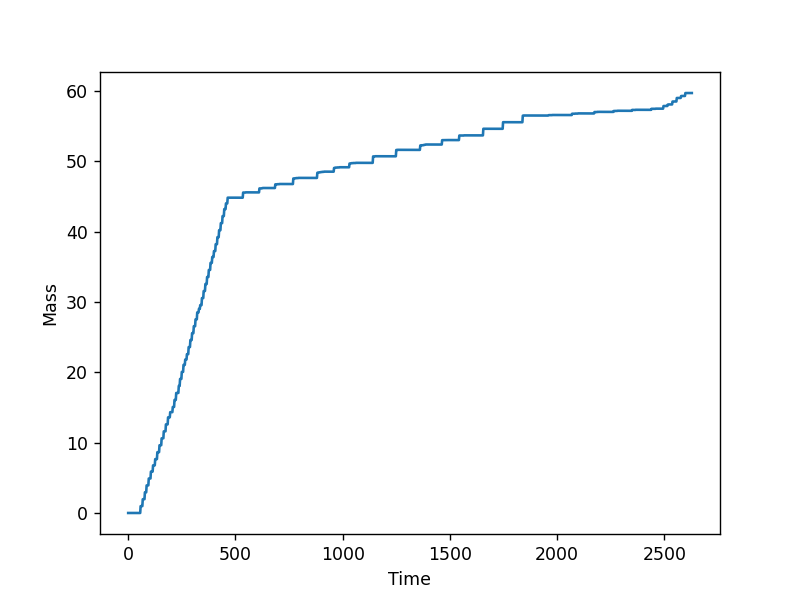

In [8]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [9]:
mass_df.to_csv('mass_data/MassProfile_290523_S541-546.csv')